In [3]:
# python libs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import scanpy as sc
import liana as li
import decoupler as dc

import session_info

In [4]:
adata=sc.read_h5ad("/nfs/team283/yd2/WE_n3_scRNAseq_filt_cells_filt_genes_raw_counts_with_QC_and_annots_lvl5_20240404.h5ad")

In [5]:
adata.obs['cell_type_lvl5'].unique().tolist()

['schwann cell precursor',
 'intermediate neural progenitor',
 'sclerotome',
 'intermediate mesoderm OSR1+',
 'erythroid HBE1+GATA1+',
 'lateral plate mesoderm PRRX1+GATA6+',
 'oligodendrocyte precursor',
 'MN',
 'dermal fibroblast FRZB+',
 'schwann cell precursor sensory',
 'meningeal fibroblast',
 'skeletal myoblast',
 'tendon progenitor',
 'V2 interneuron',
 'TREM2+ macrophage',
 'limb chondrocyte precursor SOX6+',
 'fibroblast progenitors PDGFRA+ZIC1+FIBIN+',
 'early endothelium',
 'radial glia',
 'intevertebral disc',
 'macrophage',
 'V1 interneuron',
 'dermal fibroblast FRZB+FOXF1+',
 'V0 interneuron',
 'proprioceptive neuron',
 'DL2 neuron',
 'skeletal myocyte',
 'fibroblast progenitors PDGFRA+',
 'mural PDGFRB+',
 'schwann cell precursor early autonomic',
 'p2 neural progenitor',
 'keratinocyte lower genital',
 'DL5 neuron',
 'enteric neuron',
 'DL3 neuron',
 'DL6 neuron',
 'early lymphatic endothelium',
 'skeletal myoblast hypaxial',
 'floor plate',
 'megakaryocyte',
 'pA2 neu

In [6]:
subtypes = ['mast cell',
'CSF3R+ monocyte',
'myeloid progenitor',
'macrophage',
'hepatic stellate cell',
'DC2',
'monocyte',
'megakaryocyte erythroid mast progenitor',
'early endothelium liver',
'hepatocyte',
'megakaryocyte']

In [7]:
liver = adata[adata.obs.cell_type_lvl5.isin(subtypes), :]

In [8]:
liver.obs['cell_type_lvl5'].unique().tolist()

['macrophage',
 'megakaryocyte',
 'monocyte',
 'CSF3R+ monocyte',
 'DC2',
 'hepatocyte',
 'hepatic stellate cell',
 'early endothelium liver',
 'megakaryocyte erythroid mast progenitor',
 'myeloid progenitor',
 'mast cell']

In [9]:
li.mt.show_methods()

,Method Name,Magnitude Score,Specificity Score,Reference
0,CellPhoneDB,lr_means,cellphone_pvals,"Efremova, M., Vento-Tormo, M., Teichmann, S.A...."
0,Connectome,expr_prod,scaled_weight,"Raredon, M.S.B., Yang, J., Garritano, J., Wang..."
0,log2FC,None,lr_logfc,"Dimitrov, D., Türei, D., Garrido-Rodriguez, M...."
0,NATMI,expr_prod,spec_weight,"Hou, R., Denisenko, E., Ong, H.T., Ramilowski,..."
0,SingleCellSignalR,lrscore,None,"Cabello-Aguilar, S., Alame, M., Kon-Sun-Tack, ..."
0,Rank_Aggregate,magnitude_rank,specificity_rank,"Dimitrov, D., Türei, D., Garrido-Rodriguez, M...."
0,Geometric Mean,lr_gmeans,gmean_pvals,CellPhoneDBv2's permutation approach applied t...
0,scSeqComm,inter_score,None,"Baruzzo, G., Cesaro, G., Di Camillo, B. 2022. ..."
0,CellChat,lr_probs,cellchat_pvals,"Jin, S., Guerrero-Juarez, C.F., Zhang, L., Cha..."


In [10]:
# import liana's rank_aggregate
from liana.mt import rank_aggregate

In [11]:
rank_aggregate.describe()

Rank_Aggregate returns `magnitude_rank`, `specificity_rank`. magnitude_rank and specificity_rank respectively represent an aggregate of the `magnitude`- and `specificity`-related scoring functions from the different methods.


In [12]:
# import all individual methods
from liana.method import singlecellsignalr, connectome, cellphonedb, natmi, logfc, cellchat, geometric_mean

In [13]:
liver

View of AnnData object with n_obs × n_vars = 31133 × 34584
    obs: 'dataset', 'sequencing_lane_ID', 'haniffa_ID', 'HDBR_ID', 'sequencing_type', '10x_kit', 'spatial_location', 'spatial_location_replicates', 'sort_ID', 'procedure', 'age_in_cs', 'sex', 'alignment_software', 'alignment_reference', 'nGene', 'nGene_eq-to-morethan_500', 'nUMI', 'nUMI_morethan_1000', 'passes_QC_step_1', 'percent_mito', 'percent_mito_eq-or-morethan_10pct', 'maternal_predicted', 'cutoff_3_is_doublet', 'passes_QC_step_2', 'passes_QC_step_1_and_2', 'leiden_res_3', 'leiden_res_3_sub_res_0-5', 'cell_type_lvl1', 'cell_type_lvl2', 'cell_type_lvl3', 'cell_type_lvl4-unlinked', 'cell_type_lvl5'
    var: 'gene_ids', 'feature_types', 'genome', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection', 'Used_in_scvi', 'n_cells_by_counts', 'nCells_eq-to-morethan_5', 'passes_QC_step_1'

In [14]:
liver.X.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [15]:
liver.X[0,8]

0.0

In [16]:
# log1p normalize the data
sc.pp.normalize_total(liver)
liver.X[0,8]

/nfs/team283/yd2/software/my_miniconda3/envs/liana/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.


0.0

In [17]:
sc.pp.log1p(liver)
liver.X[0,8]

0.0

In [18]:
liver

AnnData object with n_obs × n_vars = 31133 × 34584
    obs: 'dataset', 'sequencing_lane_ID', 'haniffa_ID', 'HDBR_ID', 'sequencing_type', '10x_kit', 'spatial_location', 'spatial_location_replicates', 'sort_ID', 'procedure', 'age_in_cs', 'sex', 'alignment_software', 'alignment_reference', 'nGene', 'nGene_eq-to-morethan_500', 'nUMI', 'nUMI_morethan_1000', 'passes_QC_step_1', 'percent_mito', 'percent_mito_eq-or-morethan_10pct', 'maternal_predicted', 'cutoff_3_is_doublet', 'passes_QC_step_2', 'passes_QC_step_1_and_2', 'leiden_res_3', 'leiden_res_3_sub_res_0-5', 'cell_type_lvl1', 'cell_type_lvl2', 'cell_type_lvl3', 'cell_type_lvl4-unlinked', 'cell_type_lvl5'
    var: 'gene_ids', 'feature_types', 'genome', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection', 'Used_in_scvi', 'n_cells_by_counts', 'nCells_eq-to-morethan_5', 'passes_QC_step_1'
    uns: 'log1p'

In [21]:
liver.raw = liver

In [22]:
# run cellphonedb
cellphonedb(liver,
            groupby='cell_type_lvl5',
            # NOTE by default the resource uses HUMAN gene symbols
            resource_name='consensus',
            expr_prop=0.1,
            verbose=True, key_added='cpdb_res')

Using `.raw`!
3145 features of mat are empty, they will be removed.
/nfs/team283/yd2/software/my_miniconda3/envs/liana/lib/python3.8/site-packages/liana/method/_pipe_utils/_pre.py:150: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
Using resource `consensus`.
0.03 of entities in the resource are missing from the data.


Generating ligand-receptor stats for 31133 samples and 1810 features


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:04<00:00, 15.50it/s]


In [23]:
# by default, liana's output is saved in place:
liver.uns['cpdb_res'].head()


,ligand,ligand_complex,ligand_means,ligand_props,receptor,receptor_complex,receptor_means,receptor_props,source,target,lr_means,cellphone_pvals
25126,ALB,ALB,4.991755,0.944688,FCGRT,B2M_FCGRT,2.706174,0.971488,hepatocyte,macrophage,3.848965,0.0
10758,ALB,ALB,4.991755,0.944688,FCGRT,B2M_FCGRT,2.129189,0.958088,hepatocyte,early endothelium liver,3.560472,0.0
23044,S100A9,S100A9,4.389754,0.950046,CD68,CD68,2.498205,0.953344,CSF3R+ monocyte,macrophage,3.443980,0.0
15191,SERPINA1,SERPINA1,6.241824,0.988267,LRP1,LRP1,0.466837,0.436220,hepatocyte,hepatic stellate cell,3.354331,0.0
22918,S100A9,S100A9,4.389754,0.950046,CD36,CD36,2.290894,0.942630,CSF3R+ monocyte,macrophage,3.340324,0.0


In [24]:
liver.uns['cpdb_res']['cellphone_pvals'].mean()

0.41548891746551325

In [25]:
# Run rank_aggregate
li.mt.rank_aggregate(liver,
                     groupby='cell_type_lvl5',
                     resource_name='consensus',
                     expr_prop=0.1,
                     verbose=True)


Using `.raw`!
3145 features of mat are empty, they will be removed.
/nfs/team283/yd2/software/my_miniconda3/envs/liana/lib/python3.8/site-packages/liana/method/_pipe_utils/_pre.py:150: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
Using resource `consensus`.
0.03 of entities in the resource are missing from the data.


Generating ligand-receptor stats for 31133 samples and 1810 features
Assuming that counts were `natural` log-normalized!
Running CellPhoneDB


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:59<00:00, 16.78it/s]


Running Connectome
Running log2FC
Running NATMI
Running SingleCellSignalR


In [26]:
liver.uns['liana_res'].head()


,source,target,ligand_complex,receptor_complex,lr_means,cellphone_pvals,expr_prod,scaled_weight,lr_logfc,spec_weight,lrscore,specificity_rank,magnitude_rank
23124,hepatocyte,macrophage,ALB,B2M_FCGRT,3.848965,0.0,13.508559,1.190440,4.403024,0.121070,0.968320,0.001496,4.919911e-09
10013,hepatocyte,early endothelium liver,ALB,B2M_FCGRT,3.560472,0.0,10.628389,0.906606,3.465510,0.095257,0.964428,0.013287,4.427782e-08
21196,CSF3R+ monocyte,macrophage,S100A9,CD68,3.443980,0.0,10.966508,2.058429,4.112943,0.168800,0.964962,0.000238,4.427782e-08
21072,CSF3R+ monocyte,macrophage,S100A9,CD36,3.340324,0.0,10.056462,1.991495,3.720395,0.165414,0.963467,0.000263,1.229901e-07
5503,hepatocyte,DC2,ALB,B2M_FCGRT,3.315163,0.0,8.179340,0.665258,3.236967,0.073307,0.959652,0.034653,9.641071e-07


In [27]:
myplot=li.pl.dotplot(adata = liver,
              colour='magnitude_rank',
              size='specificity_rank',
              inverse_size=True,
              inverse_colour=True,
              source_labels=['mast cell','CSF3R+ monocyte','myeloid progenitor','macrophage','hepatic stellate cell','DC2','monocyte','megakaryocyte erythroid mast progenitor',
                             'early endothelium liver','hepatocyte','megakaryocyte'],
              target_labels=['mast cell','CSF3R+ monocyte','myeloid progenitor','macrophage','hepatic stellate cell','DC2','monocyte','megakaryocyte erythroid mast progenitor',
                             'early endothelium liver','hepatocyte','megakaryocyte'],
              figure_size=(15, 8),
              top_n=10,
              orderby='magnitude_rank',
              orderby_ascending=True
             )


/nfs/team283/yd2/software/my_miniconda3/envs/liana/lib/python3.8/site-packages/liana/plotting/_common.py:104: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Fontsize 0.00 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt


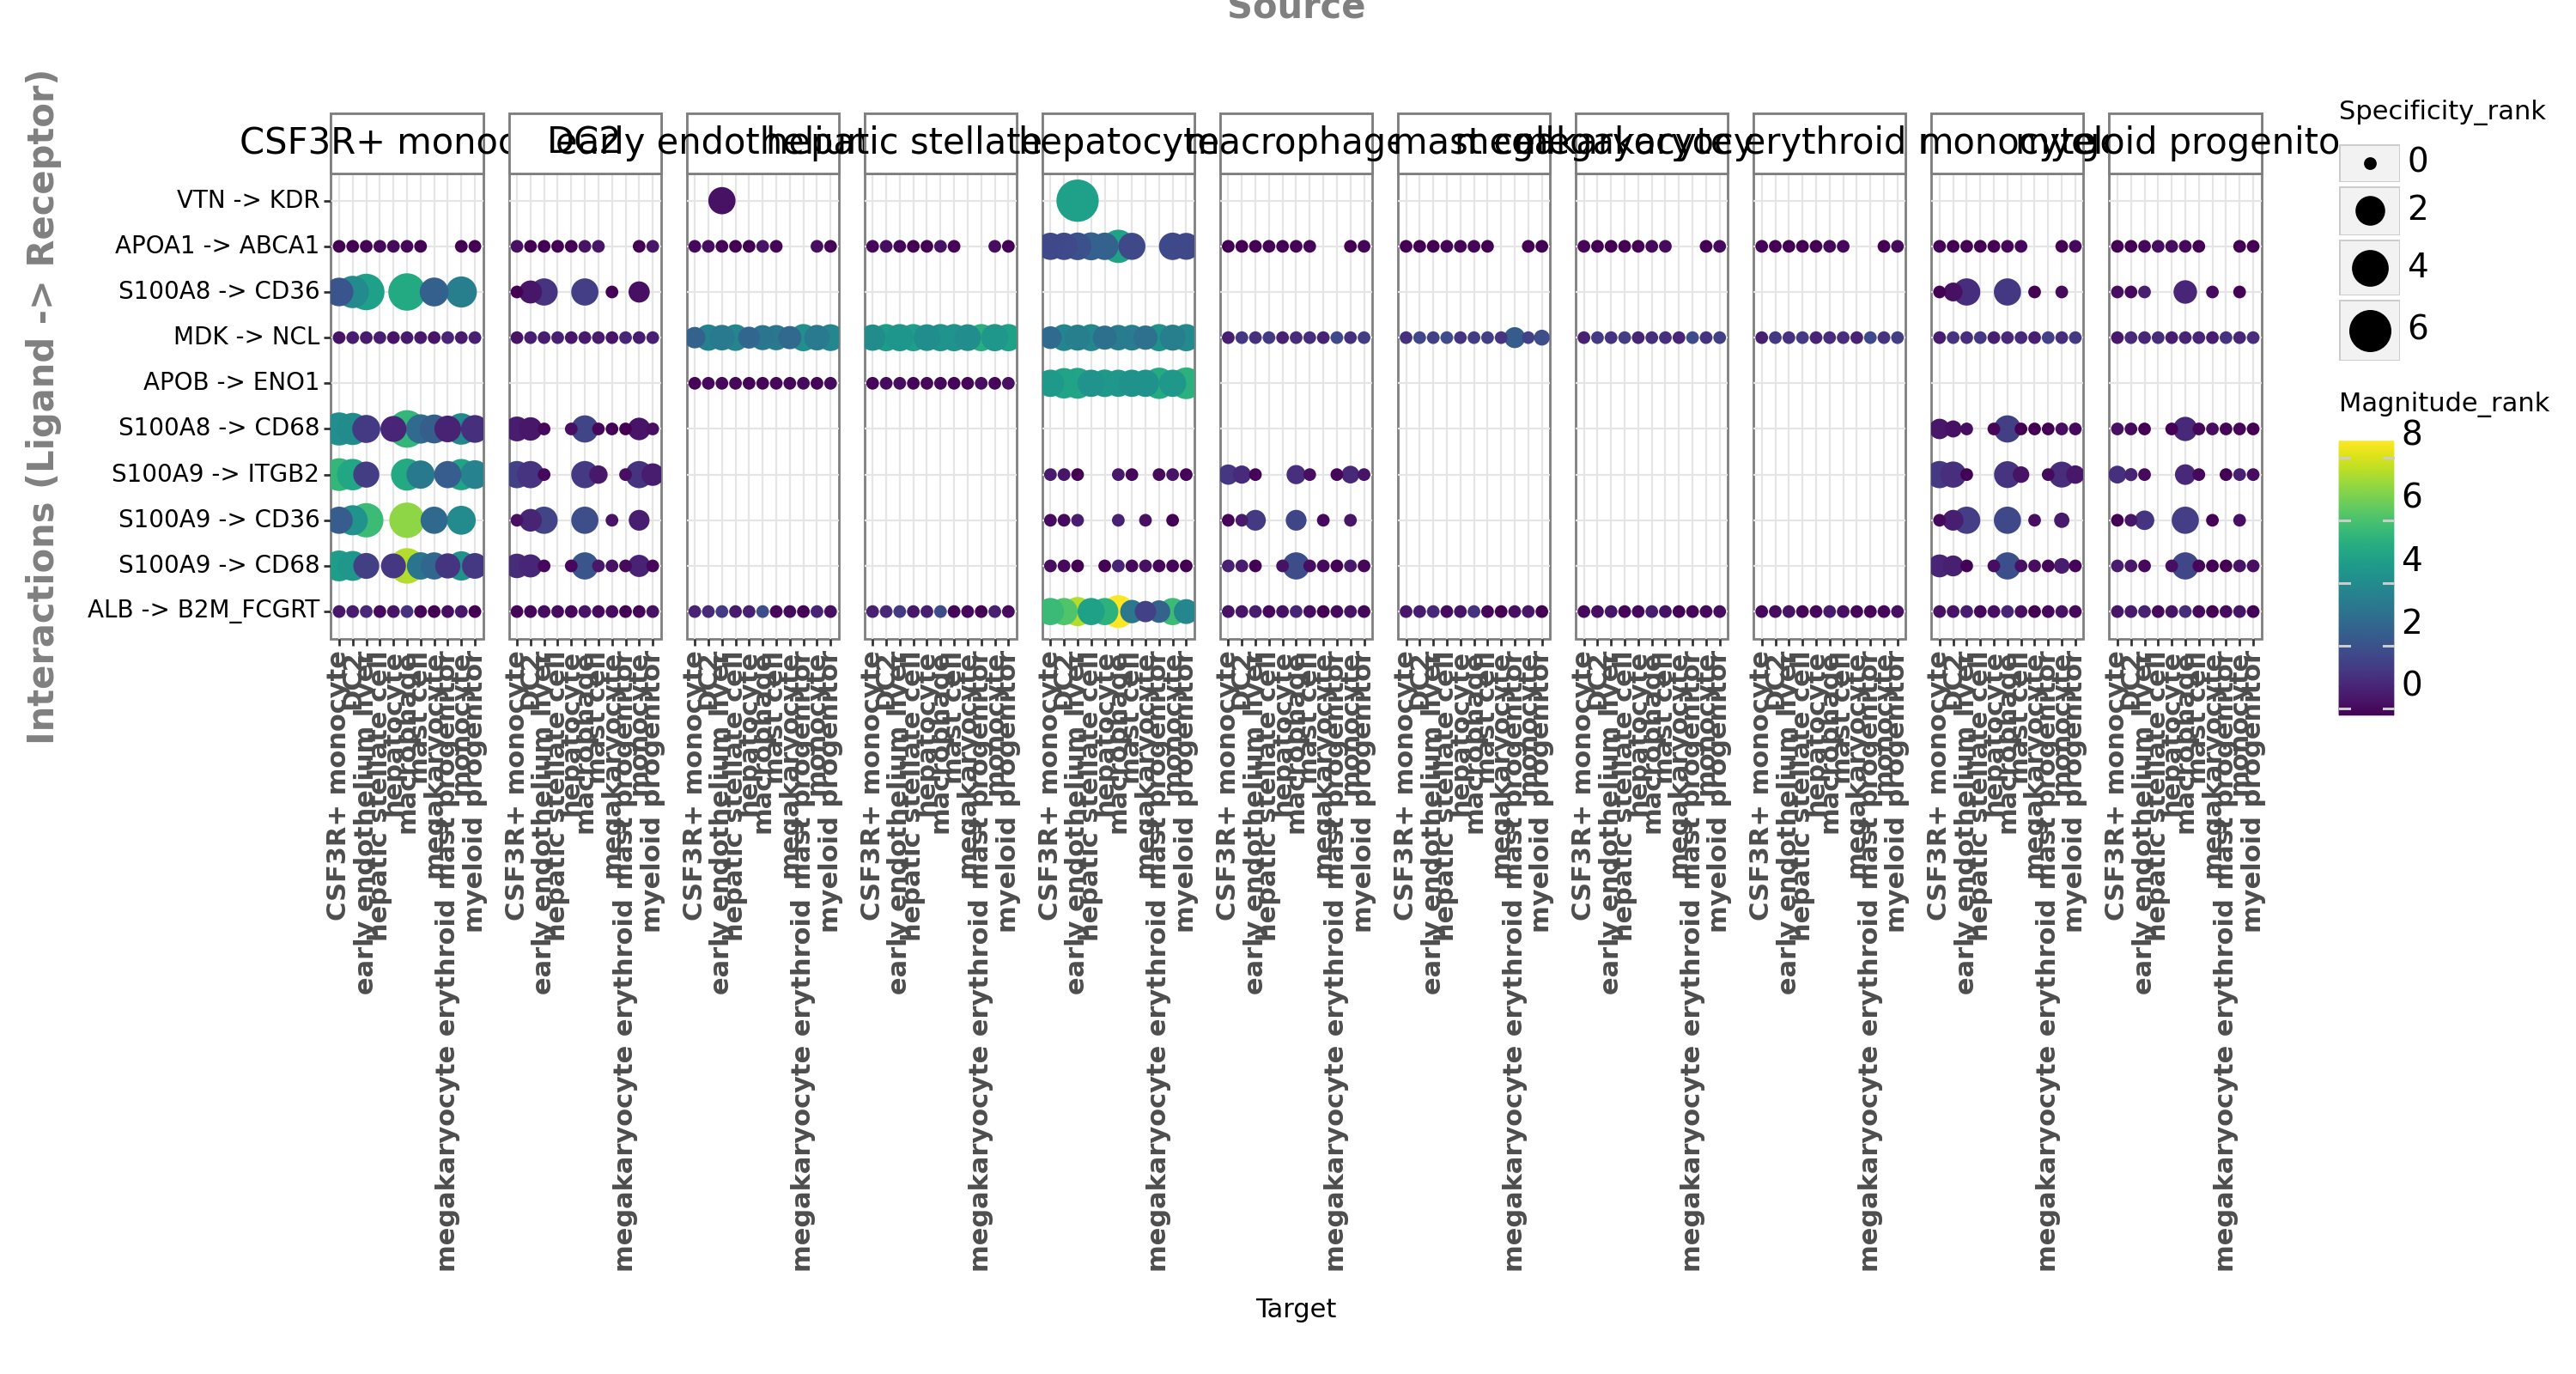

<Figure Size: (1500 x 800)>

In [28]:
myplot

Fontsize 0.00 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt


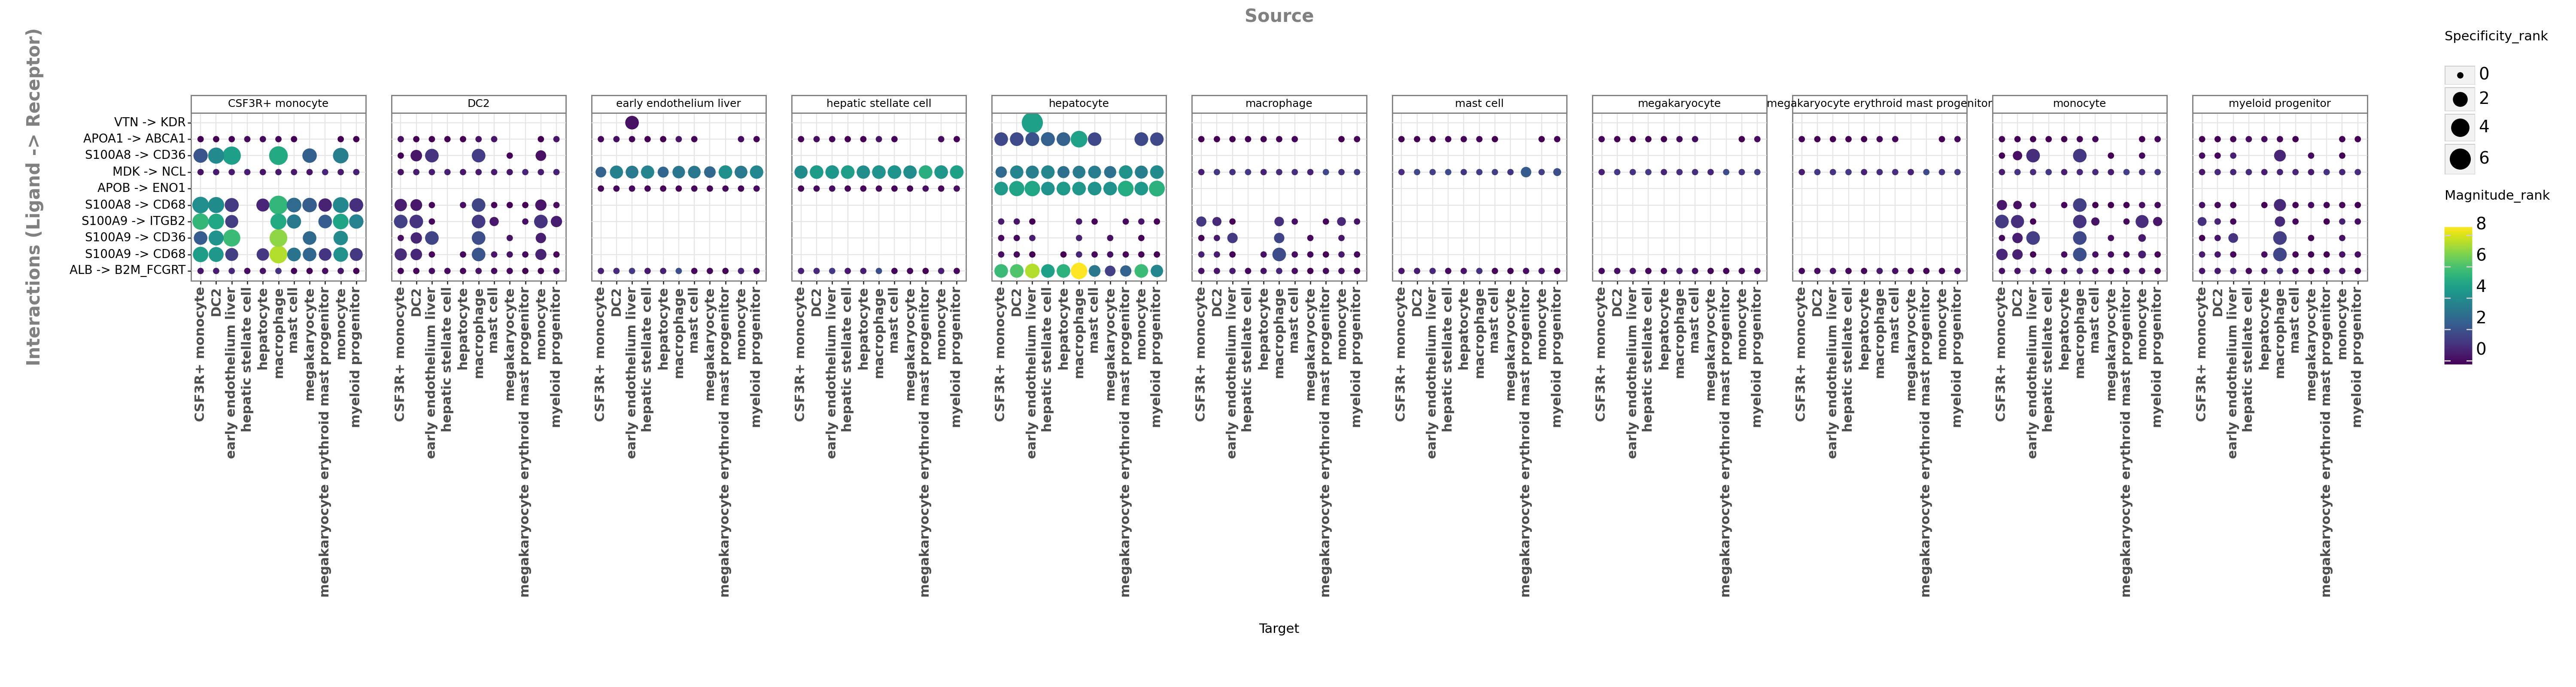

<Figure Size: (3000 x 800)>

In [30]:
# we import plotnine
import plotnine as p9
(myplot +
 # change theme
 #p9.theme_light() +
 # modify theme
 p9.theme(
     # adjust facet size
     strip_text=p9.element_text(size=9),
     figure_size=(30, 8)
 )
)

In [31]:
myplot=li.pl.dotplot(adata = liver,
              colour='magnitude_rank',
              size='specificity_rank',
              inverse_size=True,
              inverse_colour=True,
              source_labels=['mast cell'],
              target_labels=['mast cell','CSF3R+ monocyte','myeloid progenitor','macrophage','hepatic stellate cell','DC2','monocyte','megakaryocyte erythroid mast progenitor',
                             'early endothelium liver','hepatocyte','megakaryocyte'],
              figure_size=(15, 8),
              top_n=10,
              orderby='magnitude_rank',
              orderby_ascending=True
             )


/nfs/team283/yd2/software/my_miniconda3/envs/liana/lib/python3.8/site-packages/liana/plotting/_common.py:104: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Fontsize 0.00 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt


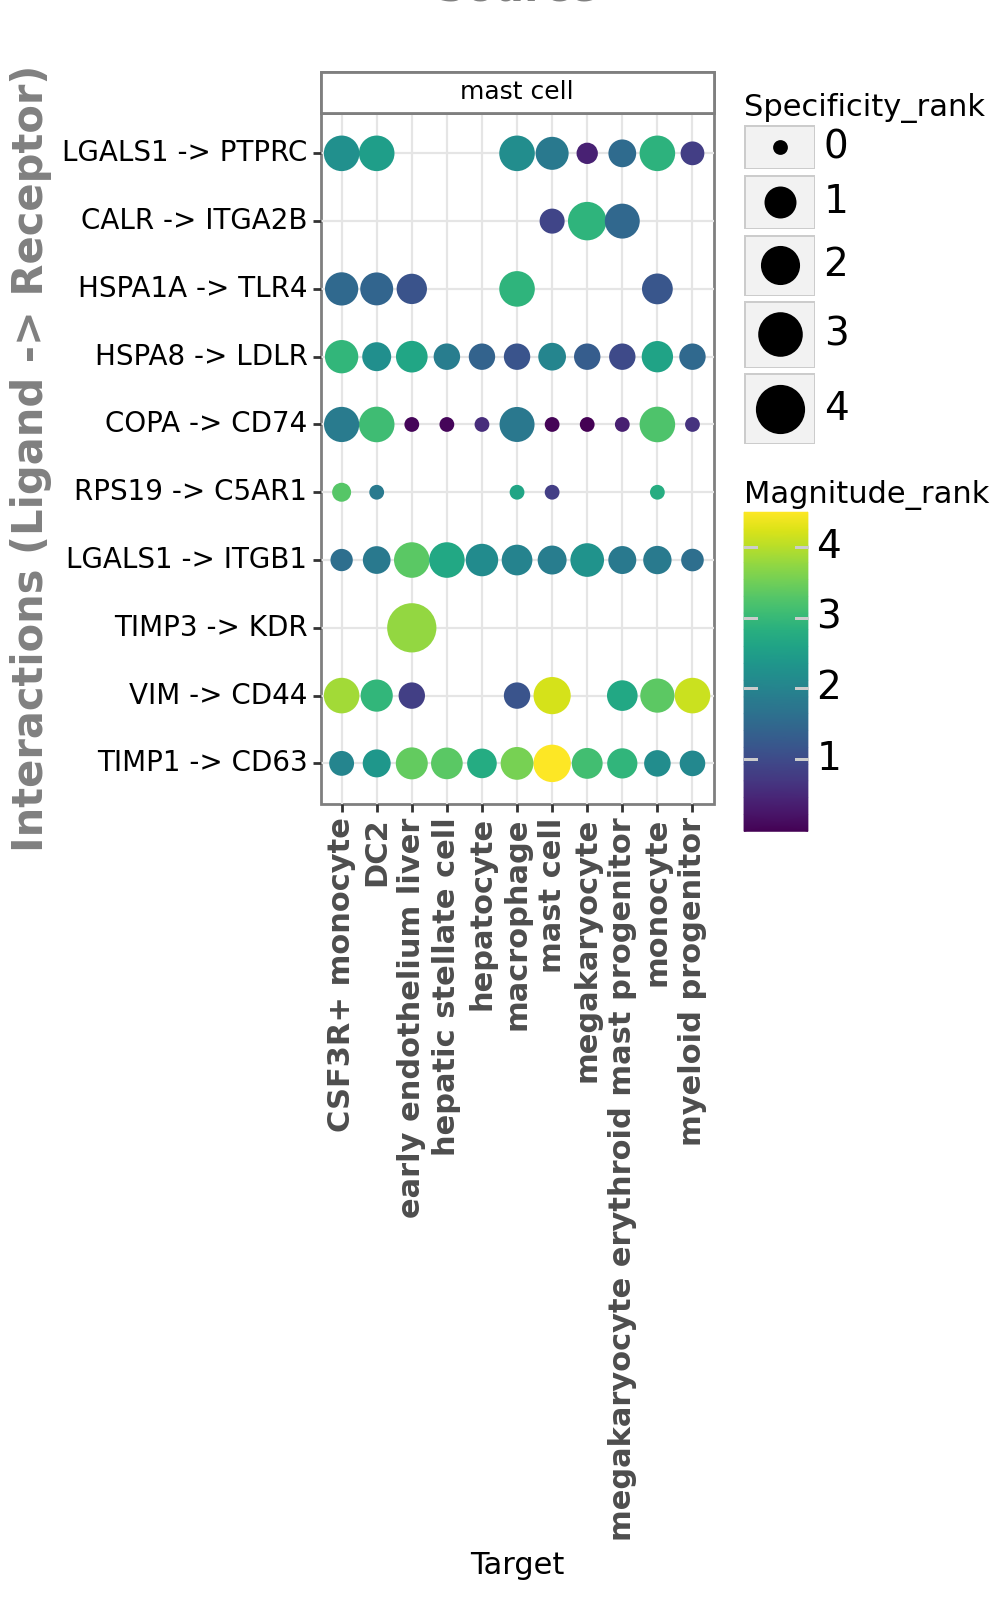

<Figure Size: (500 x 800)>

In [41]:
# we import plotnine
import plotnine as p9
(myplot +
 # change theme
 #p9.theme_light() +
 # modify theme
 p9.theme(
     # adjust facet size
     strip_text=p9.element_text(size=9),
     figure_size=(5, 8)
 )
)

In [42]:
myplot=li.pl.dotplot(adata = liver,
              colour='magnitude_rank',
              size='specificity_rank',
              inverse_size=True,
              inverse_colour=True,
              source_labels=['CSF3R+ monocyte'],
              target_labels=['mast cell','CSF3R+ monocyte','myeloid progenitor','macrophage','hepatic stellate cell','DC2','monocyte','megakaryocyte erythroid mast progenitor',
                             'early endothelium liver','hepatocyte','megakaryocyte'],
              figure_size=(15, 8),
              top_n=10,
              orderby='magnitude_rank',
              orderby_ascending=True
             )


/nfs/team283/yd2/software/my_miniconda3/envs/liana/lib/python3.8/site-packages/liana/plotting/_common.py:104: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Fontsize 0.00 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt


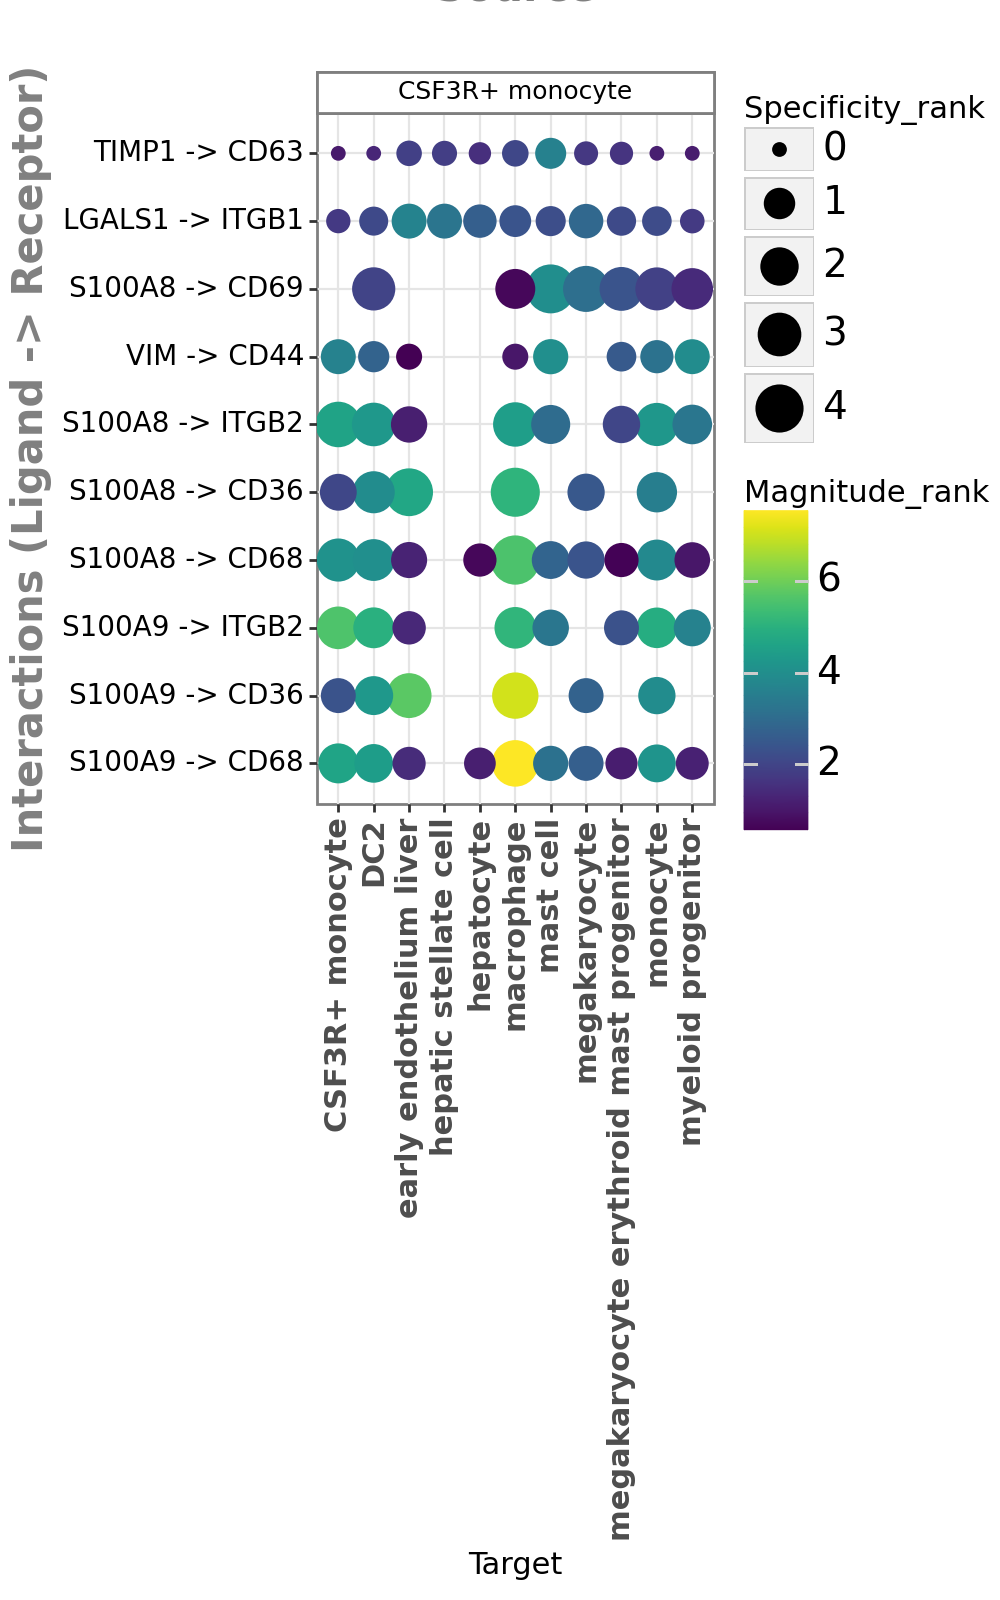

<Figure Size: (500 x 800)>

In [44]:
# we import plotnine
import plotnine as p9
(myplot +
 # change theme
 #p9.theme_light() +
 # modify theme
 p9.theme(
     # adjust facet size
     strip_text=p9.element_text(size=9),
     figure_size=(5, 8)
 )
)

In [ ]:
S100A8
S100A9
VIM
CD69
CD44
ITGB2
CD36
CD68



In [45]:
myplot=li.pl.dotplot(adata = liver,
              colour='magnitude_rank',
              size='specificity_rank',
              inverse_size=True,
              inverse_colour=True,
              source_labels=['myeloid progenitor'],
              target_labels=['mast cell','CSF3R+ monocyte','myeloid progenitor','macrophage','hepatic stellate cell','DC2','monocyte','megakaryocyte erythroid mast progenitor',
                             'early endothelium liver','hepatocyte','megakaryocyte'],
              figure_size=(15, 8),
              top_n=10,
              orderby='magnitude_rank',
              orderby_ascending=True
             )


/nfs/team283/yd2/software/my_miniconda3/envs/liana/lib/python3.8/site-packages/liana/plotting/_common.py:104: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Fontsize 0.00 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt


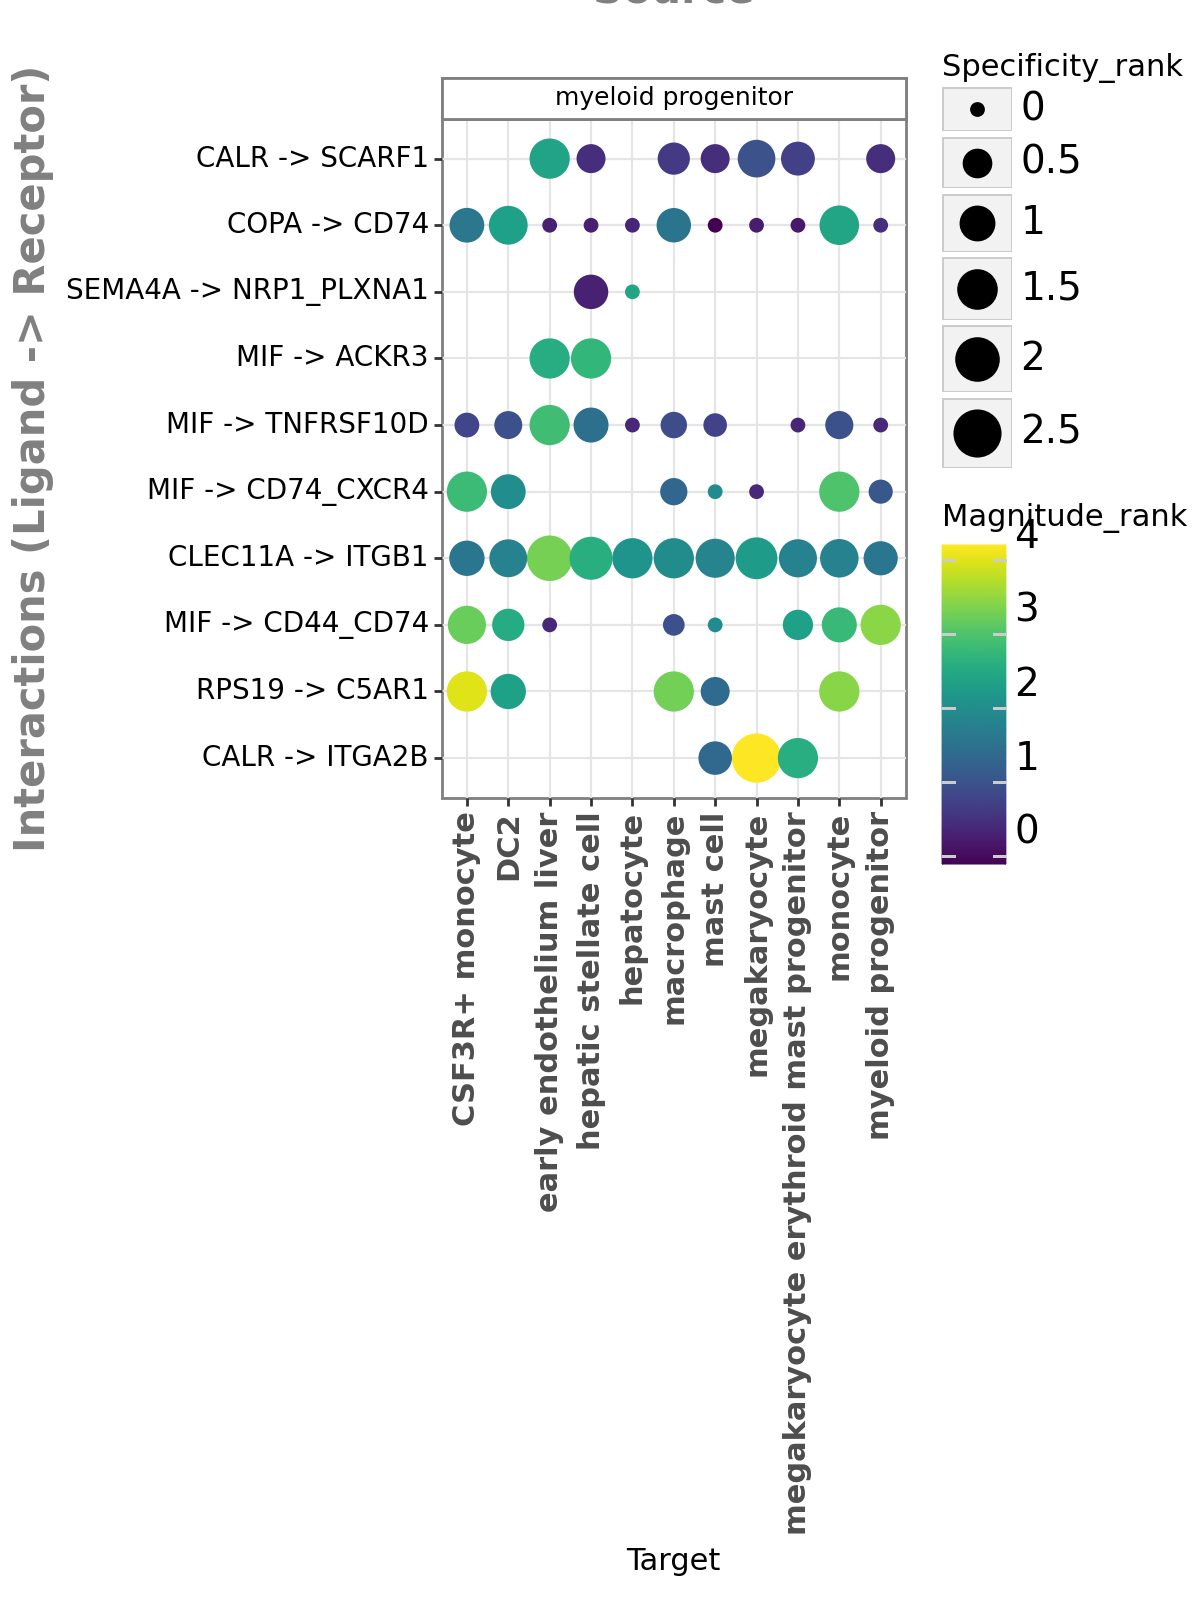

<Figure Size: (600 x 800)>

In [47]:
# we import plotnine
import plotnine as p9
(myplot +
 # change theme
 #p9.theme_light() +
 # modify theme
 p9.theme(
     # adjust facet size
     strip_text=p9.element_text(size=9),
     figure_size=(6, 8)
 )
)

In [48]:
myplot=li.pl.dotplot(adata = liver,
              colour='magnitude_rank',
              size='specificity_rank',
              inverse_size=True,
              inverse_colour=True,
              source_labels=['macrophage'],
              target_labels=['mast cell','CSF3R+ monocyte','myeloid progenitor','macrophage','hepatic stellate cell','DC2','monocyte','megakaryocyte erythroid mast progenitor',
                             'early endothelium liver','hepatocyte','megakaryocyte'],
              figure_size=(15, 8),
              top_n=10,
              orderby='magnitude_rank',
              orderby_ascending=True
             )


/nfs/team283/yd2/software/my_miniconda3/envs/liana/lib/python3.8/site-packages/liana/plotting/_common.py:104: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Fontsize 0.00 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt


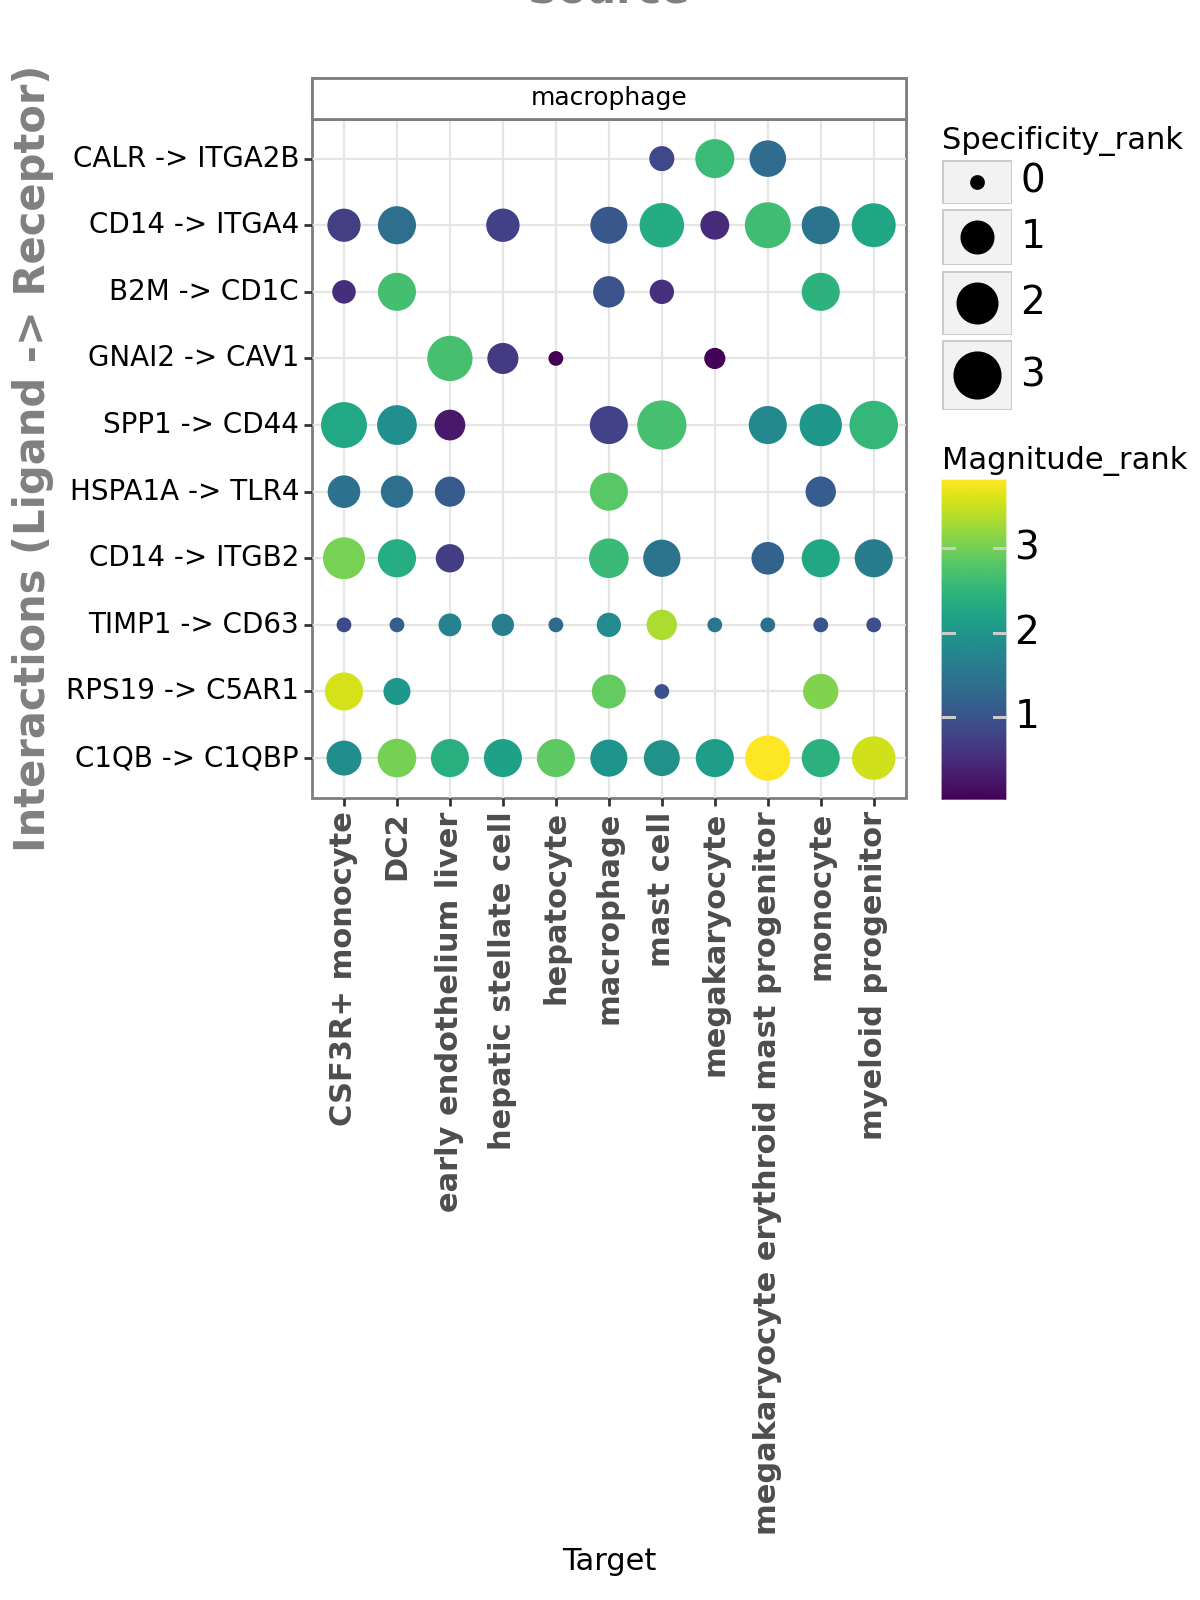

<Figure Size: (600 x 800)>

In [49]:
# we import plotnine
import plotnine as p9
(myplot +
 # change theme
 #p9.theme_light() +
 # modify theme
 p9.theme(
     # adjust facet size
     strip_text=p9.element_text(size=9),
     figure_size=(6, 8)
 )
)

In [50]:
myplot=li.pl.dotplot(adata = liver,
              colour='magnitude_rank',
              size='specificity_rank',
              inverse_size=True,
              inverse_colour=True,
              source_labels=['hepatic stellate cell'],
              target_labels=['mast cell','CSF3R+ monocyte','myeloid progenitor','macrophage','hepatic stellate cell','DC2','monocyte','megakaryocyte erythroid mast progenitor',
                             'early endothelium liver','hepatocyte','megakaryocyte'],
              figure_size=(15, 8),
              top_n=10,
              orderby='magnitude_rank',
              orderby_ascending=True
             )


/nfs/team283/yd2/software/my_miniconda3/envs/liana/lib/python3.8/site-packages/liana/plotting/_common.py:104: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Fontsize 0.00 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt


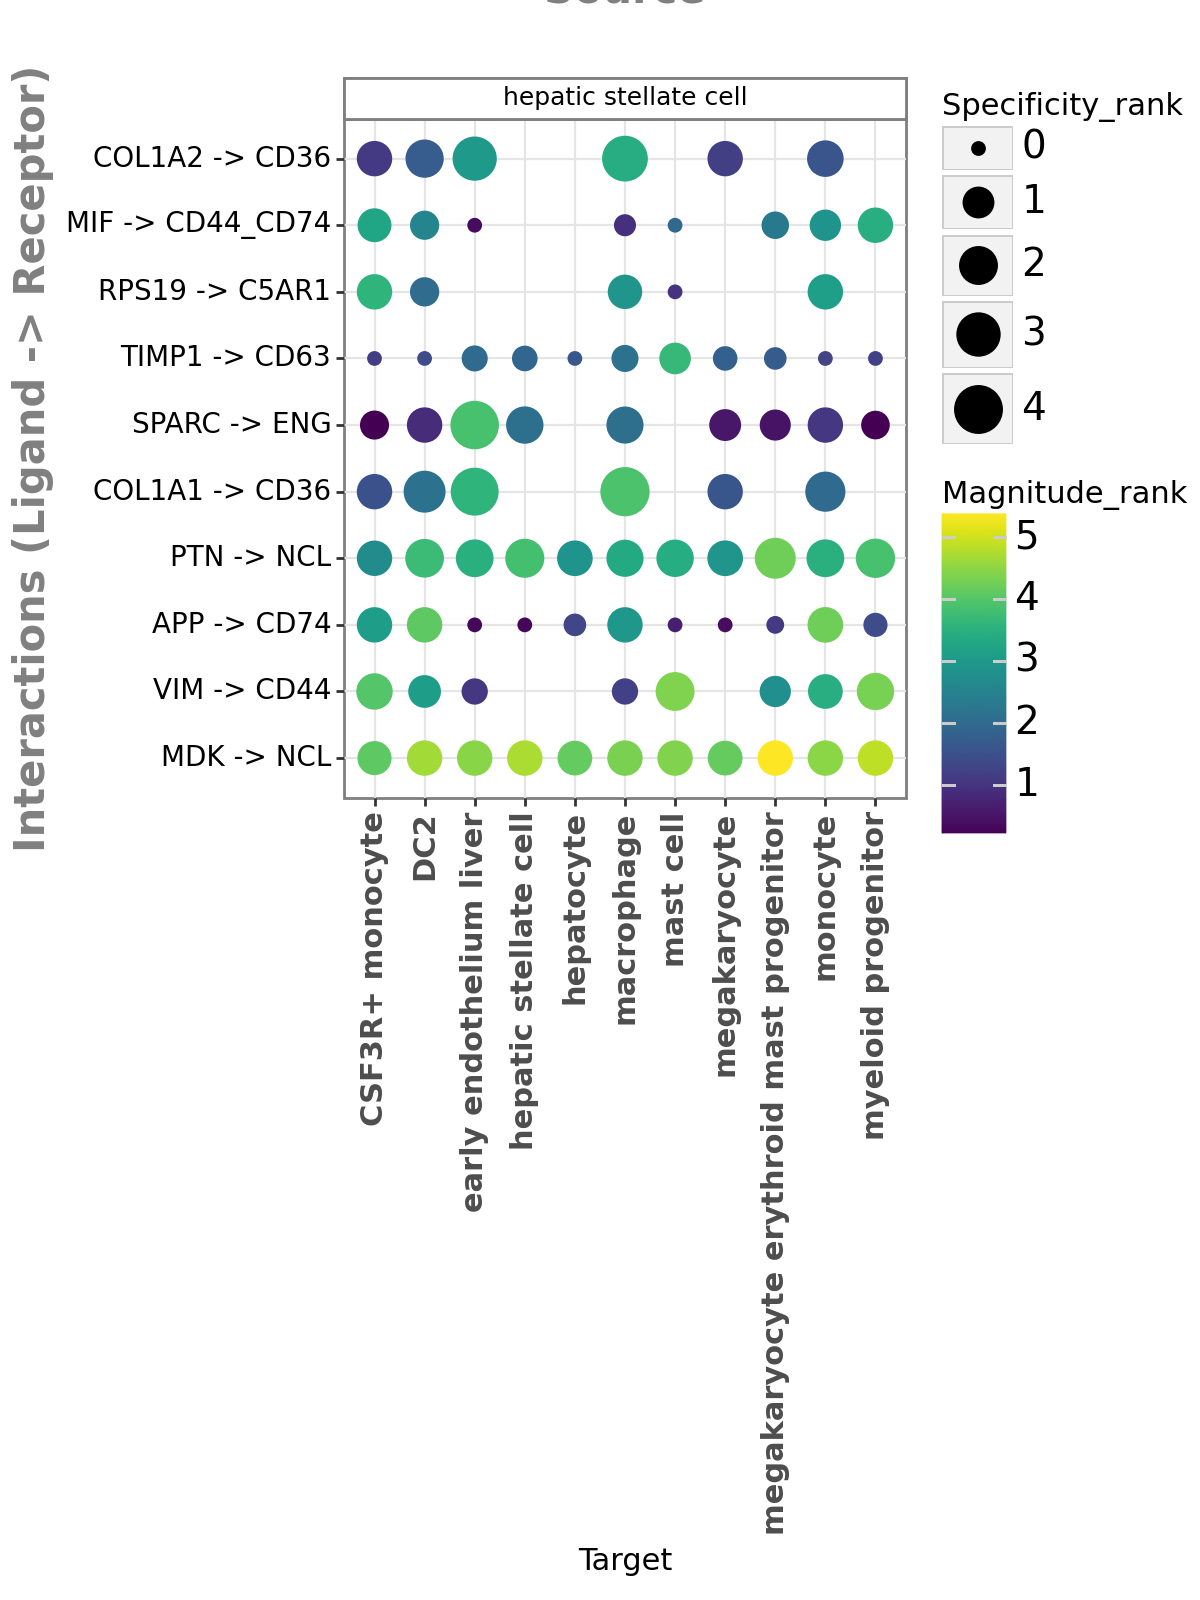

<Figure Size: (600 x 800)>

In [51]:
# we import plotnine
import plotnine as p9
(myplot +
 # change theme
 #p9.theme_light() +
 # modify theme
 p9.theme(
     # adjust facet size
     strip_text=p9.element_text(size=9),
     figure_size=(6, 8)
 )
)